In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV



In [54]:
df= pd.read_csv("../datasets/Concrete_Data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [55]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Data Cleaning

In [56]:

# dropping duplicate values
df.drop_duplicates(inplace=True)

#checking for null values 
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

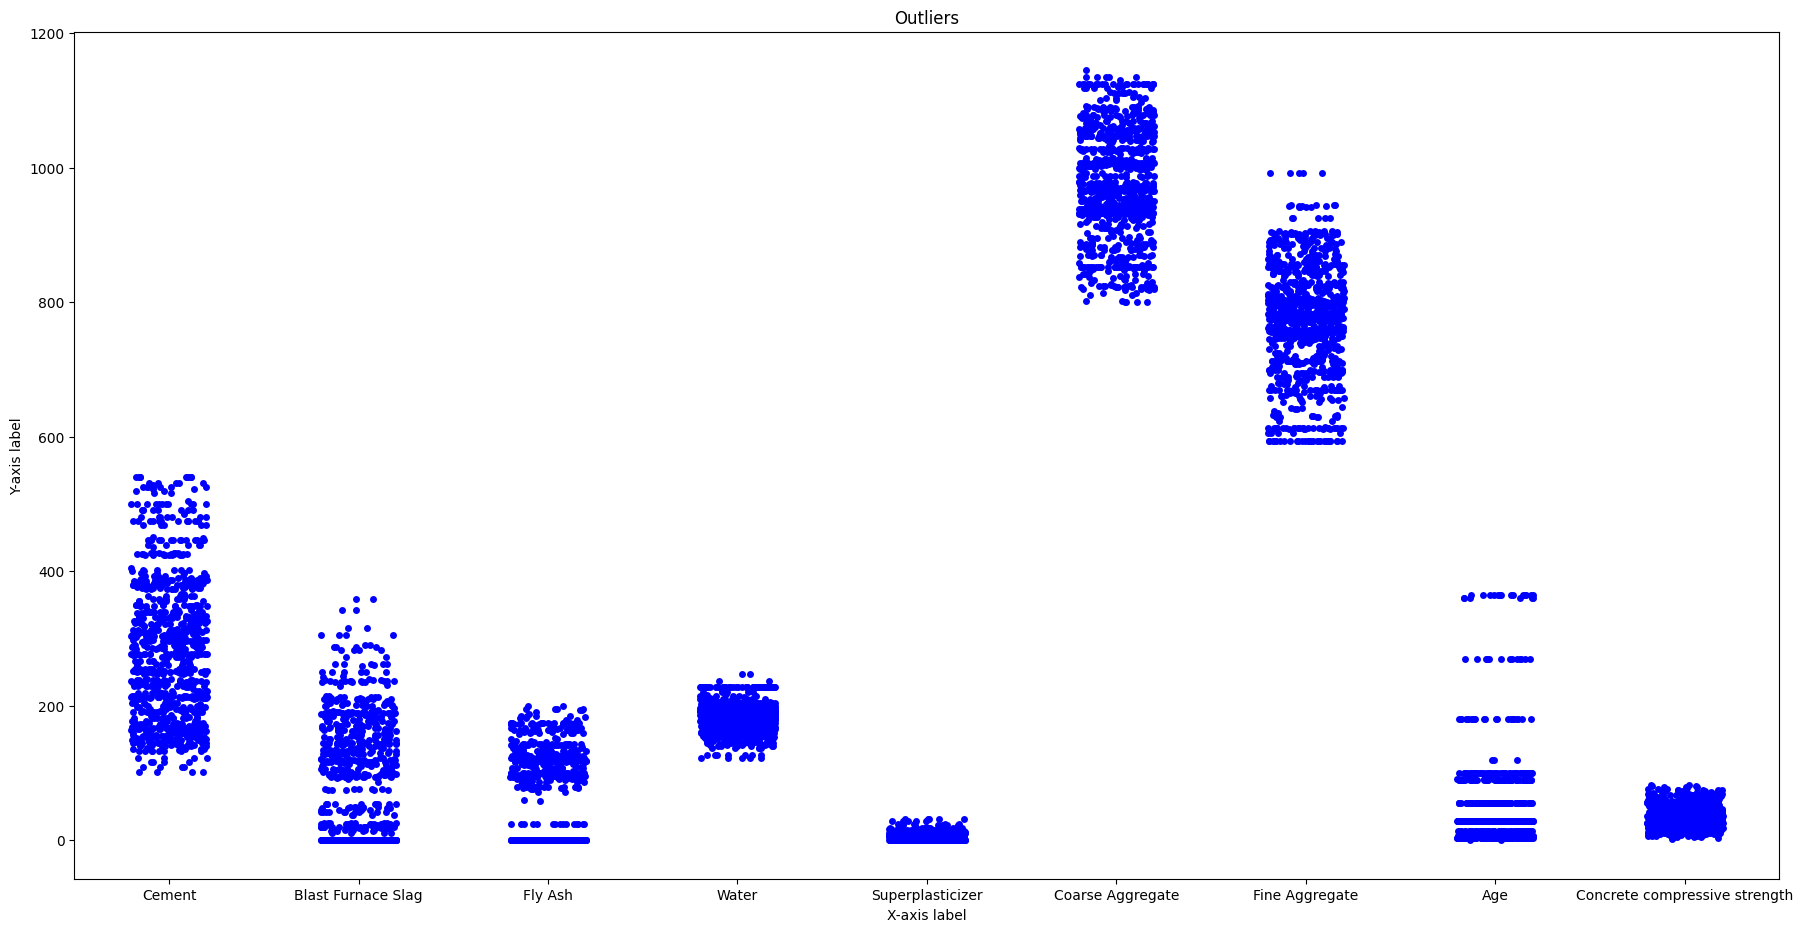

In [57]:
# visualising data points to detect outliers
import seaborn as sns
plt.figure(figsize=(22, 11))

sns.stripplot(data=df, color="blue", jitter=0.2, size=5)

plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

plt.show()


In [58]:
# Handling outliers with IQR and capping

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        
        # Apply the capping
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


Alternatively, outliers can be dropped altogether
`
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
`

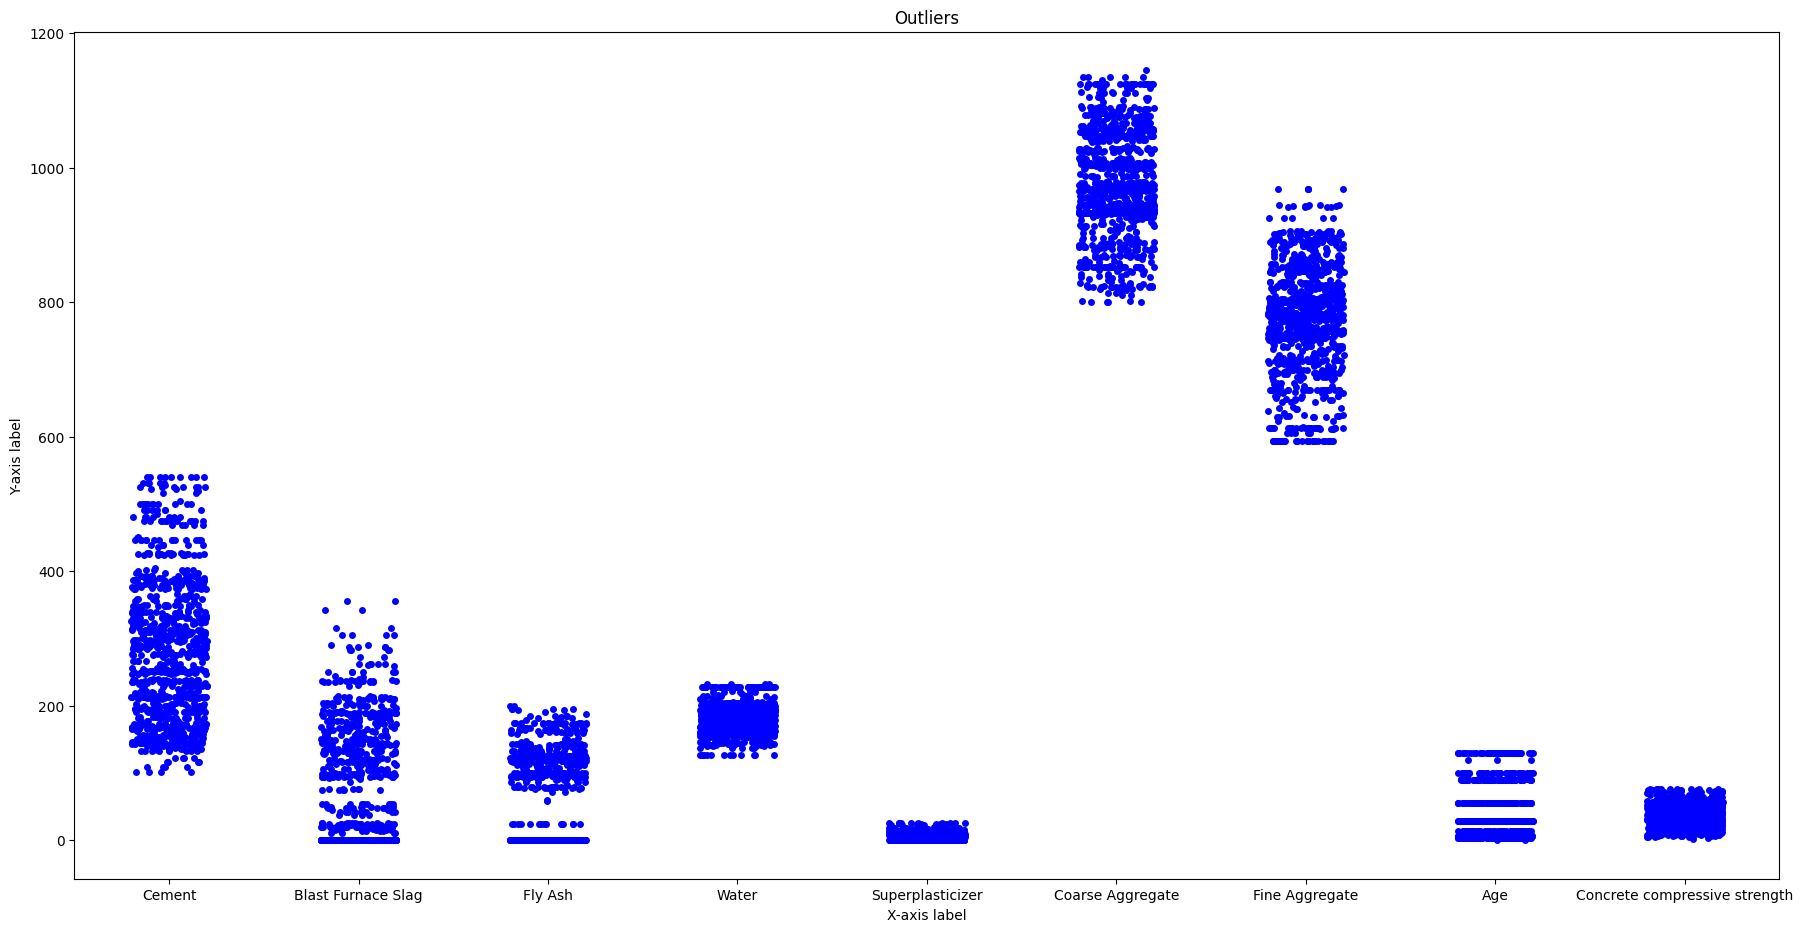

In [59]:
# visualising data points to observe changes after capping
import seaborn as sns
plt.figure(figsize=(22, 11))

sns.stripplot(data=df, color="blue", jitter=0.2, size=5)

plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

plt.show()


### Preprocessing

In [60]:
X= df.drop(columns="Concrete compressive strength")
y= df['Concrete compressive strength']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


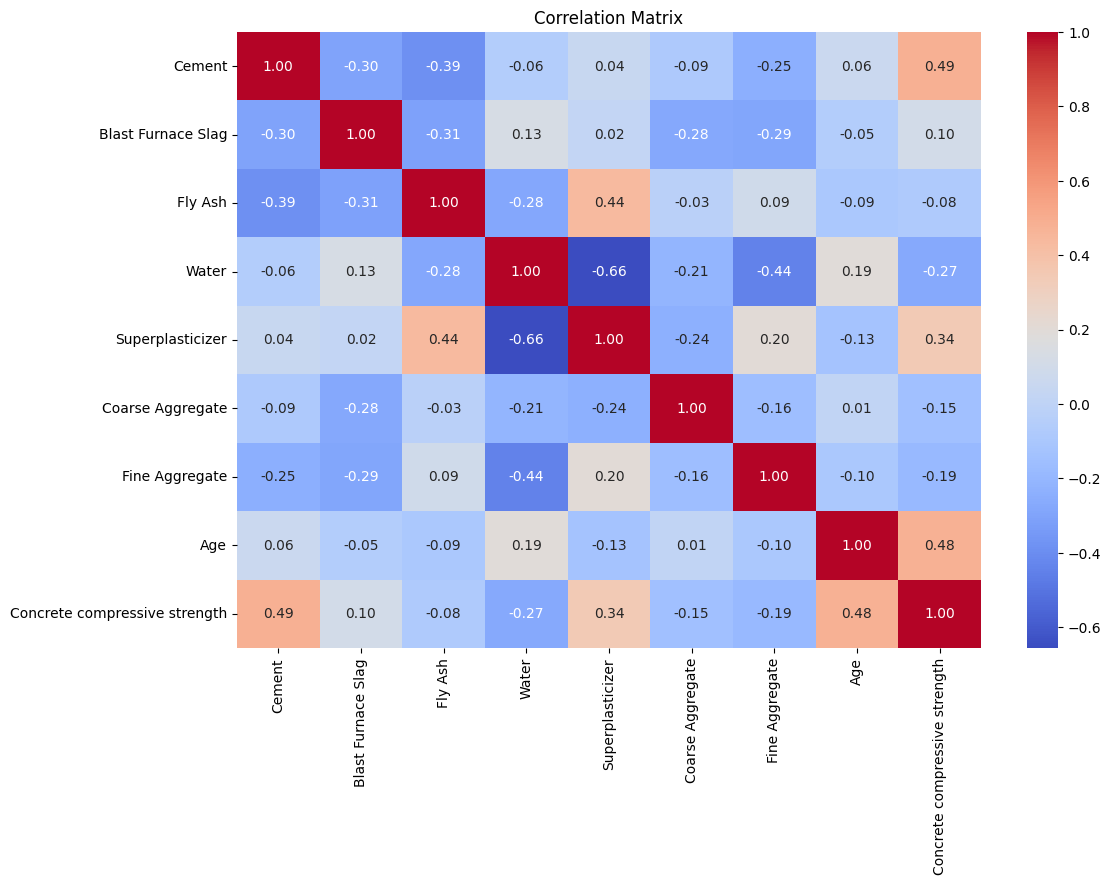

In [61]:
# calculating correlation matrix

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<p align = 'center'>As there are no highly correlated features, there's no need to remove any features</p>

### Model Training with Best Parameters

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, )
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization 
    'epsilon': [0.01, 0.1, 0.2, 0.5],  
    'kernel': ['linear','rbf'], 
}


In [63]:
# Grid Search with cross validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}


In [64]:
ypred = best_svr.predict(x_test)

### Model Evaluaion

Mean Squared Error: 32.26017108108117
R-squared: 0.88639437257224
Mean Abslute Error: 3.778436859295195


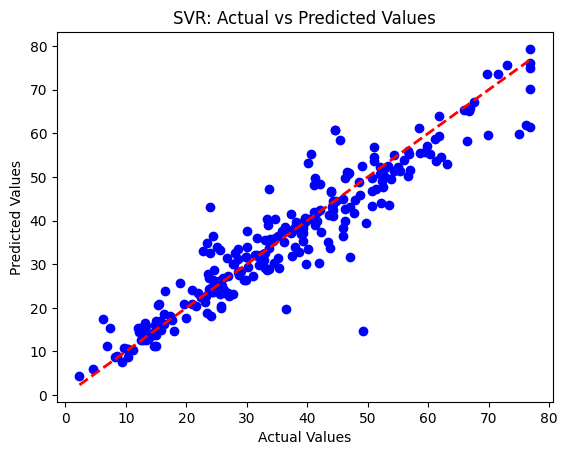

In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Abslute Error: {mae}")


plt.scatter(y_test, ypred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.show()

